In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import mglearn
from matplotlib import rc
%matplotlib inline
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

X.shape:  (26, 2)


/Users/jinyoung/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


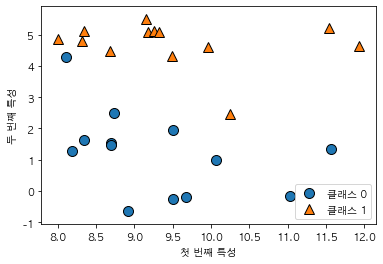

In [6]:
# 데이터셋을 만듭니다
X, y = mglearn.datasets.make_forge()

# 산점도 그립니다
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
print("X.shape: ", X.shape)

Text(0, 0.5, '타깃')

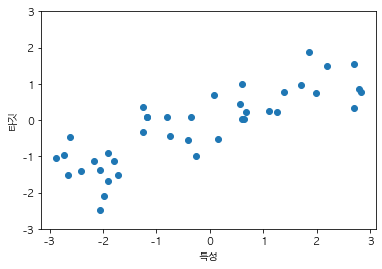

In [8]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("특성")
plt.ylabel("타깃")

In [9]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [10]:
print("유방암 데이터의 형태:", cancer.data.shape)

유방암 데이터의 형태: (569, 30)


In [11]:
print("클래스별 샘플 개수:\n", {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

클래스별 샘플 개수:
 {'malignant': 212, 'benign': 357}


In [14]:
print("특성 이름:\n", cancer.feature_names)

특성 이름:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [15]:
from sklearn.datasets import load_boston
boston = load_boston()
print("데이터의 형태:", boston.data.shape)

데이터의 형태: (506, 13)


In [16]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape:", X.shape)

X.shape: (506, 104)


## KNN

/Users/jinyoung/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


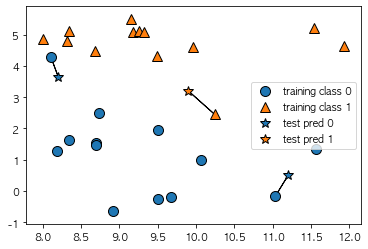

In [17]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

/Users/jinyoung/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


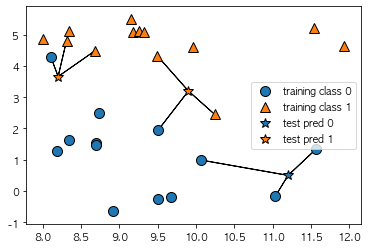

In [18]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [19]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

/Users/jinyoung/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [20]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [21]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [22]:
print("테스트 세트 예측:", clf.predict(X_test))

테스트 세트 예측: [1 0 1 0 1 0 0]


In [23]:
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도: 0.86


## KNN Classifier 분석 - Decision Boundary

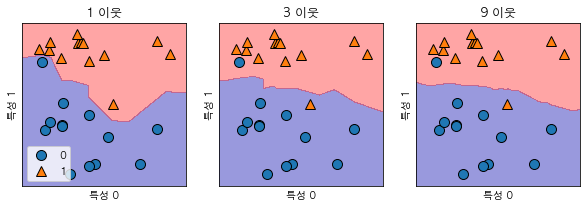

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # fit 메소드는 self 오브젝트를 리턴합니다
    # 그래서 객체 생성과 fit 메소드를 한 줄에 쓸 수 있습니다.
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)

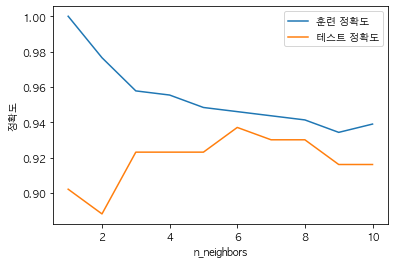

In [25]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

# 1에서 10까지 n_neighbors를 적용
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

## KNN - 회귀

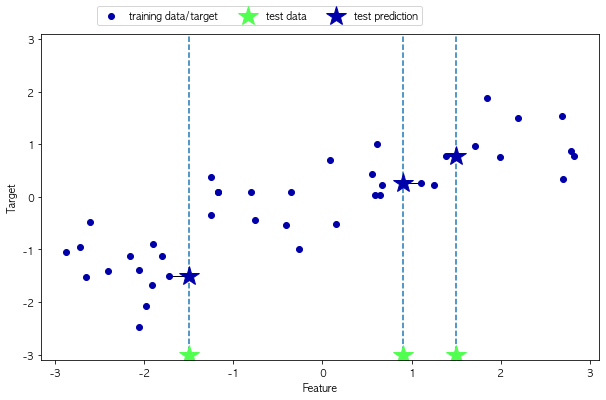

In [26]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

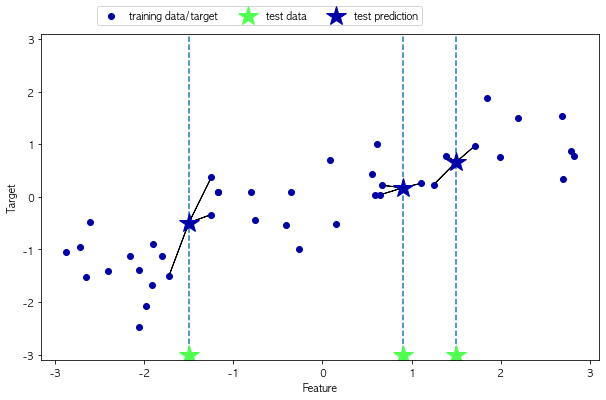

In [27]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [28]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# wave 데이터셋을 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 이웃의 수를 3으로 하여 모델의 객체를 만듭니다.
reg = KNeighborsRegressor(n_neighbors=3)
# 훈련 데이터와 타깃을 사용하여 모델을 학습시킵니다
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [29]:
print("테스트 세트 예측:\n", reg.predict(X_test))

테스트 세트 예측:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [31]:
print("테스트 R^2: {:.2f}".format(reg.score(X_test, y_test)))

테스트 R^2: 0.83


## KNN Regressor 분석 

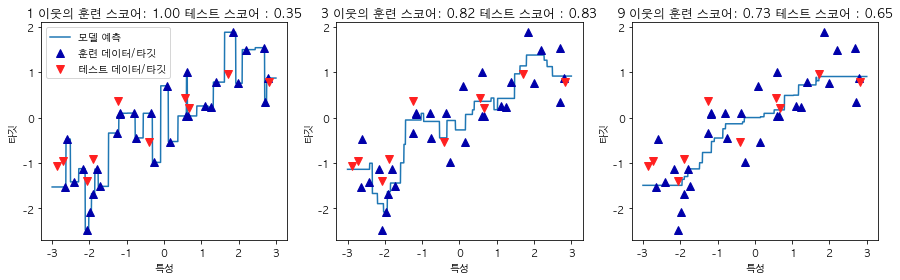

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# -3과 3사이에 1,000개의 데이터 포인트를 만듭니다
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax, in zip([1, 3, 9], axes):
    # 1, 3, 9 이웃을 사용한 예측을 합니다
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title("{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어 : {:.2f}".format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc="best")

array([[-3.        ],
       [-2.99399399],
       [-2.98798799],
       [-2.98198198],
       [-2.97597598],
       [-2.96996997],
       [-2.96396396],
       [-2.95795796],
       [-2.95195195],
       [-2.94594595],
       [-2.93993994],
       [-2.93393393],
       [-2.92792793],
       [-2.92192192],
       [-2.91591592],
       [-2.90990991],
       [-2.9039039 ],
       [-2.8978979 ],
       [-2.89189189],
       [-2.88588589],
       [-2.87987988],
       [-2.87387387],
       [-2.86786787],
       [-2.86186186],
       [-2.85585586],
       [-2.84984985],
       [-2.84384384],
       [-2.83783784],
       [-2.83183183],
       [-2.82582583],
       [-2.81981982],
       [-2.81381381],
       [-2.80780781],
       [-2.8018018 ],
       [-2.7957958 ],
       [-2.78978979],
       [-2.78378378],
       [-2.77777778],
       [-2.77177177],
       [-2.76576577],
       [-2.75975976],
       [-2.75375375],
       [-2.74774775],
       [-2.74174174],
       [-2.73573574],
       [-2